In [110]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


csv_file = Path('Resources/framingham.csv')

heart_analysis_df = pd.read_csv(csv_file)

heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Male vs Female Population

### Analysis:

males: 1820
females: 2420
total population: 4240


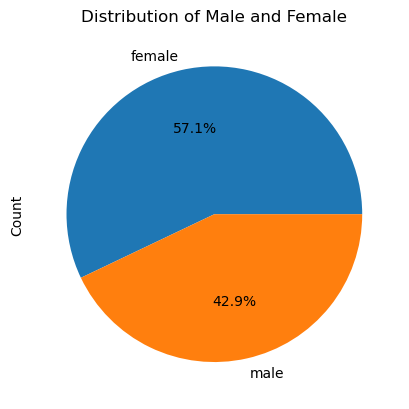

In [111]:
male_count = (heart_analysis_df['male'] == 1).sum()
female_count = (heart_analysis_df['male'] == 0).sum()
print(f'males: {male_count}')
print(f'females: {female_count}')
print(f'total population: {male_count+female_count}')
labels = ['female', 'male']
sizes = [female_count, male_count]
sex_population_df = pd.DataFrame({'Sex': labels, 'Count': sizes})
sex_population_df.plot.pie(y='Count', labels=sex_population_df['Sex'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Male and Female')
plt.show()

Diabetes: 109
Non-diabetic: 4131
Total population: 4240


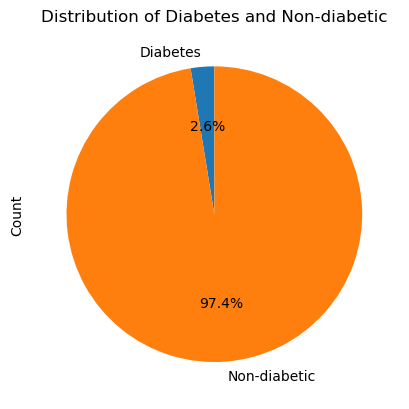

In [112]:
diabetes_count = (heart_analysis_df['diabetes'] == 1).sum()
non_diabetes_count = (heart_analysis_df['diabetes'] == 0).sum()
print(f'Diabetes: {diabetes_count}')
print(f'Non-diabetic: {non_diabetes_count}')
print(f'Total population: {diabetes_count+non_diabetes_count}')
labels = ['Diabetes', 'Non-diabetic']
sizes = [diabetes_count, non_diabetes_count]
diabetes_population_df = pd.DataFrame({'diabetes': labels, 'Count': sizes})
diabetes_population_df.plot.pie(y='Count', labels=diabetes_population_df['diabetes'], autopct='%1.1f%%', legend=False, startangle=90)
plt.title('Distribution of Diabetes and Non-diabetic')
plt.show()

In [113]:
contingency_table = pd.crosstab(heart_analysis_df['diabetes'], heart_analysis_df['TenYearCHD'])

# Perform the Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 38.48233814115802
P-value: 5.525144036275509e-10
Degrees of freedom: 1
Expected frequencies:
[[3503.55566038  627.44433962]
 [  92.44433962   16.55566038]]


Diabetes: 2095
Non-diabetic: 2145
Total population: 4240


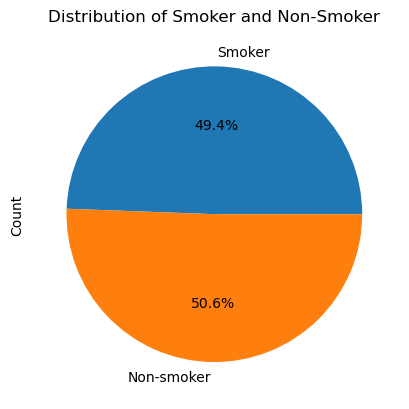

In [114]:
smoker_count = (heart_analysis_df['currentSmoker'] == 1).sum()
non_smoker_count = (heart_analysis_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Smoker and Non-Smoker')
plt.show()

Diabetes: 1106
Non-diabetic: 714
Total population: 1820


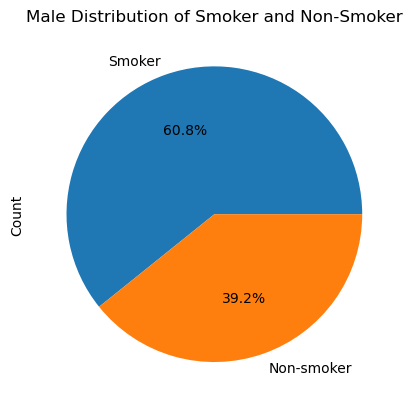

In [115]:
male_df = heart_analysis_df[heart_analysis_df['male'] == 1]
smoker_count = (male_df['currentSmoker'] == 1).sum()
non_smoker_count = (male_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Male Distribution of Smoker and Non-Smoker')
plt.show()

Diabetes: 989
Non-diabetic: 1431
Total population: 2420


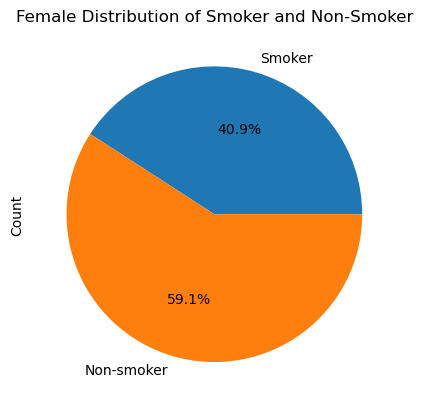

In [116]:
female_df = heart_analysis_df[heart_analysis_df['male'] == 0]
smoker_count = (female_df['currentSmoker'] == 1).sum()
non_smoker_count = (female_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Female Distribution of Smoker and Non-Smoker')
plt.show()

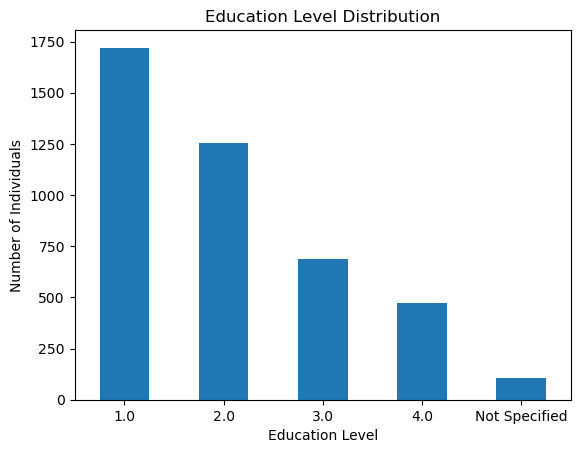

In [117]:

education_counts_df = heart_analysis_df

education_counts_df['education'] = education_counts_df['education'].astype(str)

education_counts_df['education'] = education_counts_df['education'].replace('nan', 'Not Specified')

education_counts_df = education_counts_df['education'].value_counts().sort_index()

education_counts_df.plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0) 
plt.show()

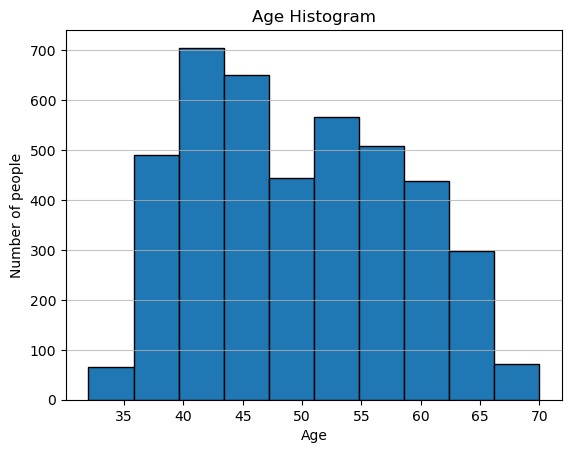

In [118]:
# Create a histogram for the age distribution
age_histogram = heart_analysis_df
plt.hist(age_histogram['age'], bins=10, edgecolor='black') 
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.75) 

plt.show()

In [119]:
number_of_male_TYCHD = male_df[male_df['TenYearCHD'] == 1]['TenYearCHD'].sum()
number_of_female_TYCHD = female_df[female_df['TenYearCHD'] == 1]['TenYearCHD'].sum()

male_percentage = round((number_of_male_TYCHD/male_df["TenYearCHD"].count()) * 100, 2)
female_percentage = round((number_of_female_TYCHD/female_df["TenYearCHD"].count()) * 100, 2)

print(f'Male % of heart disease: {male_percentage}%')
print(f'Female % of heart disease: {female_percentage}%')

Male % of heart disease: 18.85%
Female % of heart disease: 12.44%


## Atuls's Section

In [120]:
print('This is your teammates Atul\'s Section')

This is your teammates Atul's Section


## Ezrelle's Section

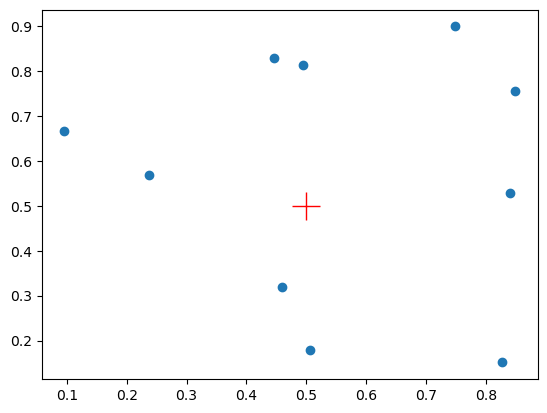

In [121]:
import numpy as np
# Generate some random data
data = {'x': np.random.rand(10),
        'y': np.random.rand(10)}
df = pd.DataFrame(data)

# Plot the data
plt.scatter(df['x'], df['y'])

# Coordinates where you want to place the plus sign
plus_x, plus_y = 0.5, 0.5 # Adjust these values as needed

# Plotting the plus sign
plt.plot(plus_x, plus_y, marker='+', markersize=20, color='red')

# Display the plot
plt.show()

## Indu's Section

In [122]:
print('This is your teammates Indu\'s Section')

This is your teammates Indu's Section


## Tianyue's Section
Focus: Evaluate the impact of PrevalentStroke, PrevalentHyp towards heart disease 

In [123]:
print('This is your teammates Tianyue's Section')

SyntaxError: unterminated string literal (detected at line 1) (648222502.py, line 1)

In [ ]:
heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


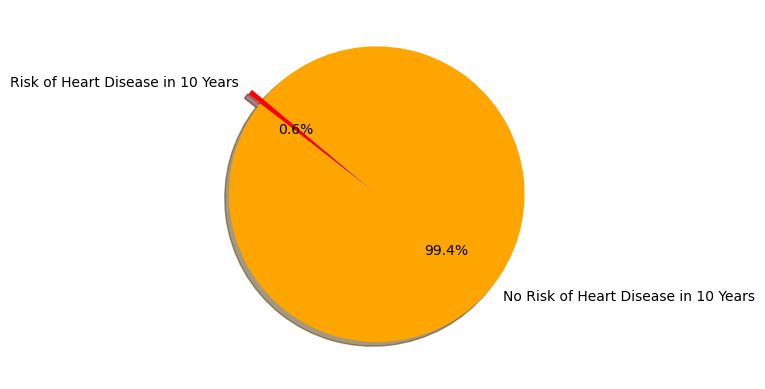

In [ ]:
# Relation between Prevalent Stroke to Heart Disease:
labels = ["Risk of Heart Disease in 10 Years", "No Risk of Heart Disease in 10 Years"]

prevalentStroke_df = heart_analysis_df[heart_analysis_df["prevalentStroke"]==1]
no_prevalentStroke_df = heart_analysis_df[heart_analysis_df["prevalentStroke"]==0]

sizes = [len(prevalentStroke_df), len(no_prevalentStroke_df)]

# sizes = [prevalentStroke_df["prevalentStroke"],no_prevalentStroke_df["prevalentStroke"]]

colors = ["red", "orange"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

#  --------------------------

# labels = ["Prevalent Stroke", "No Prevalent Stroke"]
# prevalentStroke_df["TenYearCHD"]
# no_prevalentStroke_df["TenYearCHD"]
# sizes = [prevalentStroke_df["TenYearCHD"],no_prevalentStroke_df["TenYearCHD"]]

# colors = ["lightcoral", "lightskyblue"]
# explode = (0.1, 0)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()
# -----------------------------
# plt.hist(heart_analysis_df["prevalentStroke"])

# plt.scatter(heart_analysis_df["prevalentStroke"],heart_analysis_df["TenYearCHD"])
# plt.scatter.(heart_analysis_df.iloc[:,1],heart_analysis_df.iloc[:,2])
# plt.xlabel('Risk of Heart Disease in 10 Years')
# plt.ylabel('Patients with Prevalent Stroke')
# plt.show()

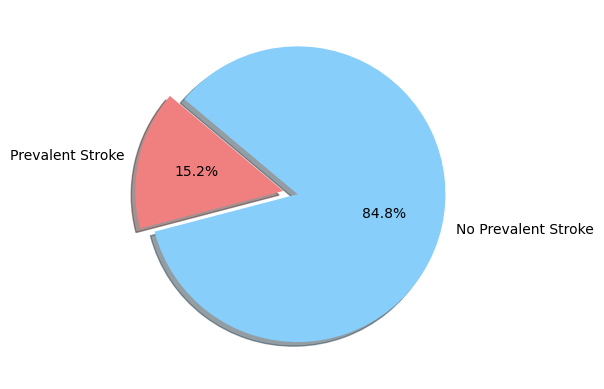

In [ ]:
labels = ["Prevalent Stroke", "No Prevalent Stroke"]
TenYearCHD_df = heart_analysis_df[heart_analysis_df["TenYearCHD"]==1]
no_TenYearCHD_df = heart_analysis_df[heart_analysis_df["TenYearCHD"]==0]

sizes = [len(TenYearCHD_df), len(no_TenYearCHD_df)]  # Use the lengths of the dataframes instead of the "prevalentStroke" column

colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [ ]:
# Combined analysis: Relation between Prevalent Stroke to Heart Disease:
import seaborn as sns
# ------------
Summary_Stroke_df = heart_analysis_df[["prevalentStroke"]]
Summary_Heart_Disease_df = heart_analysis_df[["TenYearCHD"]]

# Drop rows with NaN values
Summary_Stroke_df = Summary_Stroke_df.dropna()
Summary_Heart_Disease_df = Summary_Heart_Disease_df.dropna()

correlation_matrix = Summary_Stroke_df.corrwith(Summary_Heart_Disease_df)
# correlation_matrix = correlation_matrix.squeeze()

if correlation_matrix.isnull().all():
    print("No valid correlation to visualize.")
else:
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

No valid correlation to visualize.


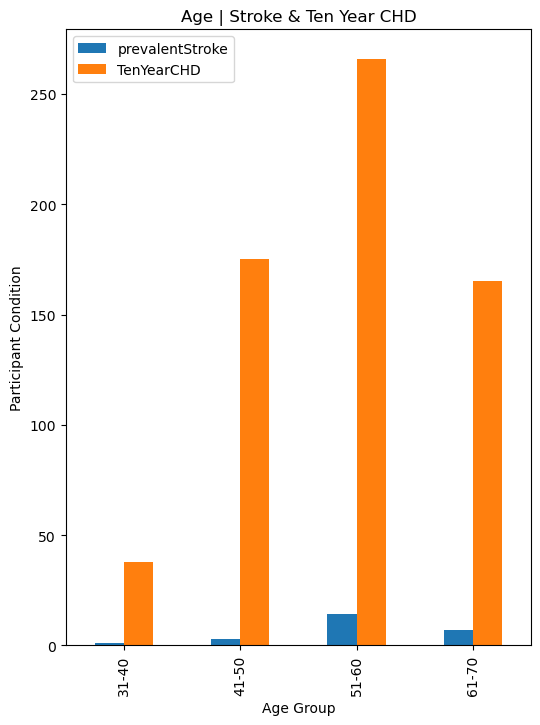

In [ ]:
# Impact of age on Stroke and TenYearCHD

all_stroke_CHD_df = heart_analysis_df[['age', 'prevalentStroke', 'TenYearCHD']].groupby('age').sum()
all_stroke_CHD_df


# # Define the age ranges
age_data = all_stroke_CHD_df.index.tolist()
age_data

age_range = [31,40,50,60,70]

# # Create a new column 'Age Group' based on the age ranges
all_stroke_CHD_df['Age Group'] = pd.cut(age_data, bins=age_range, labels=["31-40", "41-50", "51-60", "61-70"])
age_group_df = all_stroke_CHD_df.groupby("Age Group").sum()
age_group_df.head()

group_chart = age_group_df.plot(kind="bar", figsize=(6,8))
group_chart
plt.xlabel("Age Group")
plt.ylabel('Participant Condition')
plt.title("Age | Stroke & Ten Year CHD")
plt.show() 


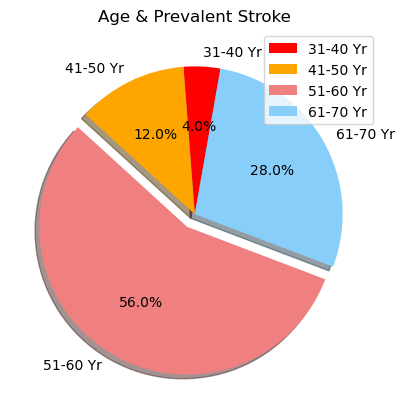

In [ ]:
# pie chart for impact of age on Stroke 
# and TenYearCHD

# Labels for the sections of our pie chart
labels = ["31-40 Yr", "41-50 Yr", "51-60 Yr", "61-70 Yr"]

# The values of each section of the pie chart
sizes = age_group_df.prevalentStroke

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "51-60 yr" section from the others
explode = (0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title("Age & Prevalent Stroke")
plt.legend()
plt.show()

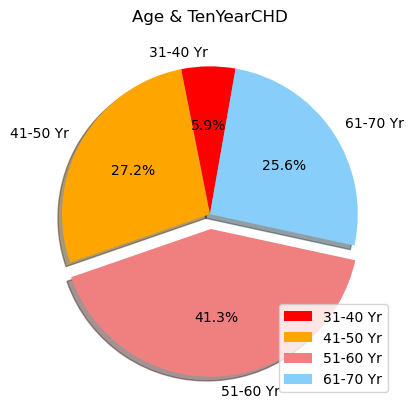

In [ ]:
# pie chart for impact of age on Stroke 
# and TenYearCHD

# Labels for the sections of our pie chart
labels = ["31-40 Yr", "41-50 Yr", "51-60 Yr", "61-70 Yr"]

# The values of each section of the pie chart
sizes = age_group_df.TenYearCHD

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "51-60 yr" section from the others
explode = (0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title("Age & TenYearCHD")
plt.legend()
plt.show()

In [ ]:
heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


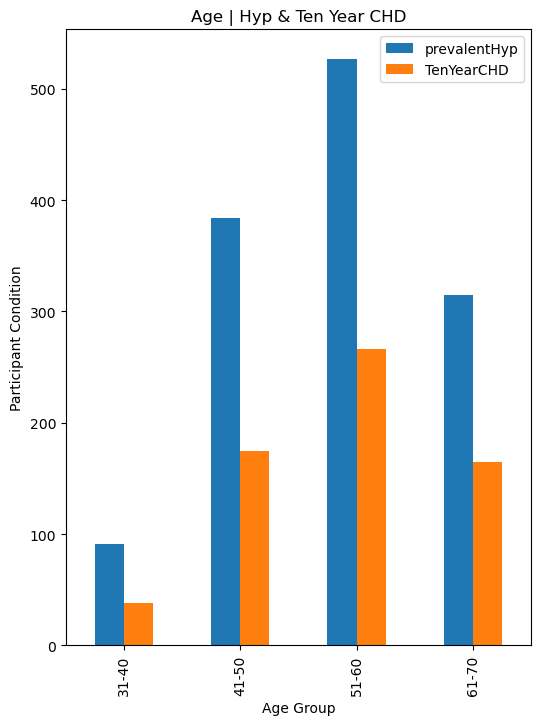

In [ ]:
all_Hyp_CHD_df = heart_analysis_df[['age', 'prevalentHyp', 'TenYearCHD']].groupby('age').sum()
all_Hyp_CHD_df


# # Define the age ranges
age_data = all_Hyp_CHD_df.index.tolist()
age_data

age_range = [31,40,50,60,70]

# # Create a new column 'Age Group' based on the age ranges
all_Hyp_CHD_df['Age Group'] = pd.cut(age_data, bins=age_range, labels=["31-40", "41-50", "51-60", "61-70"])
age_group_Hyp_df = all_Hyp_CHD_df.groupby("Age Group").sum()
age_group_Hyp_df.head()

group_chart = age_group_Hyp_df.plot(kind="bar", figsize=(6,8))
group_chart
plt.xlabel("Age Group")
plt.ylabel('Participant Condition')
plt.title("Age | Hyp & Ten Year CHD")
plt.show() 


# T-test

The r-value is: 0.03564680514395061
y = -0.26x +22.03


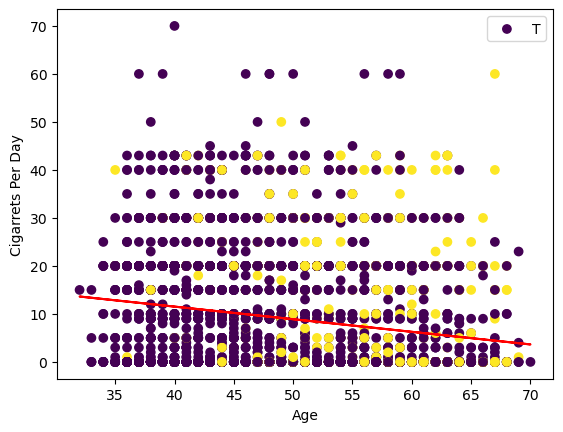

In [109]:
# scatter plot
heart_analysis_df = heart_analysis_df.dropna()

x_value = (heart_analysis_df["age"]).astype(float)
y_value = (heart_analysis_df["cigsPerDay"]).astype(float)

# x_value = list((heart_analysis_df["age"]).astype(float))
# y_value = list((heart_analysis_df["cigsPerDay"]).astype(float))

x_value
y_value

z_value = (heart_analysis_df["TenYearCHD"]).astype(float)
z_value
binary = [0,1]

plt.scatter(x_value, y_value,c=z_value, marker="o")
# plt.colorbar(label="TenYearCHD")
plt.legend("TenYearCHD")
plt.xlabel('Age')
plt.ylabel('Cigarrets Per Day')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
slope

line = slope * x_value + intercept
plt.plot(x_value, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()


# Bar plot
# plt.hist(heart_analysis_df["prevalentStroke"])
# plt.hist(heart_analysis_df["currentSmoker"])
# plt.xlabel('Current Smoker')
# plt.ylabel('Prevalent Stroke')

# plt.title("Current Smoker correlation to Prevalent Stroke")
# plt.show()




# Analysis: As age increases, the amount of cigarrets per day stays relatively consistent; Meanwhile the amount of participants having heart disease does not show a siginificant decrease as the amounts of cigarrets per day being decreased.
# This could indicate a lack of correlation between cigarrets per day and the risk of having heart disease in 10 years.

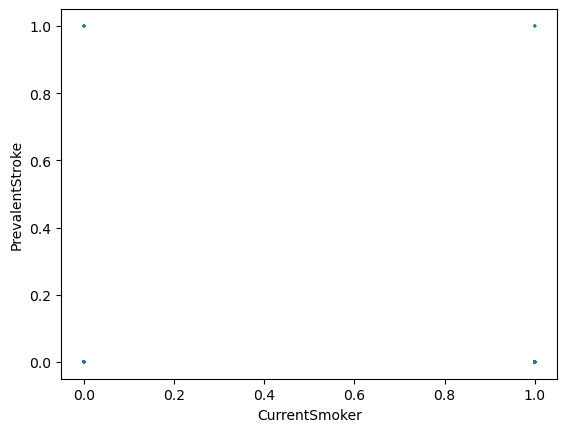

The r-value is: 0.0010877058459932475
y = -0.01x +0.01


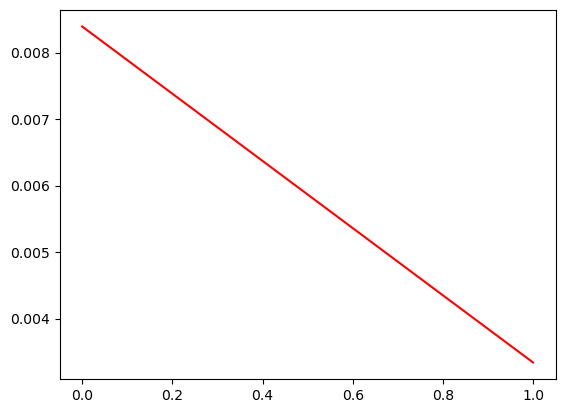

In [ ]:

x_value = heart_analysis_df["currentSmoker"]
y_value = heart_analysis_df["prevalentStroke"]
z_value = heart_analysis_df["TenYearCHD"]

plt.scatter(x_value, y_value,z_value, marker="o")
plt.xlabel('CurrentSmoker')
plt.ylabel('PrevalentStroke')
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
line = slope * x_value + intercept
plt.plot(x_value, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
    

In [24]:


import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection





In [25]:
contingency_table = pd.crosstab(heart_analysis_df['diabetes'], heart_analysis_df['TenYearCHD'])

# Perform the Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 38.48233814115802
P-value: 5.525144036275509e-10
Degrees of freedom: 1
Expected frequencies:
[[3503.55566038  627.44433962]
 [  92.44433962   16.55566038]]


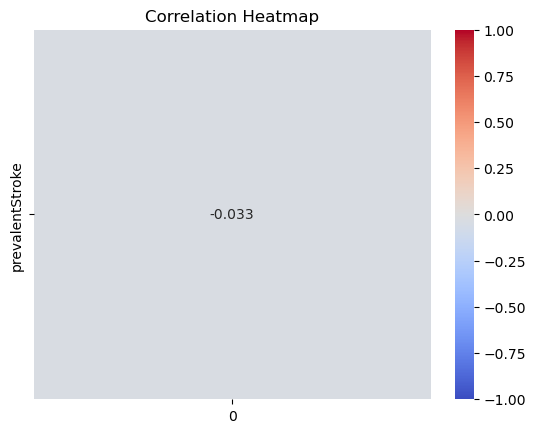

In [66]:
# Current smoker vs prevalent Stroke
Summary_Current_Smoker = heart_analysis_df["currentSmoker"]

# Drop rows with NaN values
Summary_Current_Smoker = Summary_Current_Smoker.dropna()

correlation_matrix = Summary_Stroke_df.corrwith(Summary_Current_Smoker)

# correlation_matrix = Summary_Stroke_df[['Summary_Current_Smoker', 'Summary_Heart_Disease_df']].corr()


# correlation_matrix = correlation_matrix.squeeze()

if correlation_matrix.isnull().all():
    print("No valid correlation to visualize.")
else:
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
